## Import packages and set seed

- It is highly probable that the folder "auxiliary_scripts" will change its name in the future.
- If this happens then it would be converted into a package called "wavesuite_auxiliary_scripts" and it would have to be installed and imported

In [1]:
#It is highly probable that this folder will change its name in th future
import sys

sys.path.insert(0, '../../auxiliary_scripts/')

In [2]:
import time  
import numpy as np

from torch_geometric.loader import DataLoader

In [3]:
#import AE_Models
from train_AE_functions import set_seed, train_AE, evaluate, model_MSE_error

from graph_functions import create_graph_data_list_mnist 
from plot_results_mnist import evaluate_and_plot_mnist , compare_three_plots_models_mnist

from rank_models import plot_losses , rank_losses 

In [4]:
set_seed(42)

True

## Create the list of Data objects where each element is a graph

In [5]:
graph_data_list_mnist , n_points = create_graph_data_list_mnist(num_samples_to_use=1000, mnist_path="../../../Datasets/")

In [6]:
graph_data_list_mnist[0]

Data(x=[784, 1], edge_index=[2, 2970])

## Shuffle graph_data_list before splitting

In [7]:
#Compute the number of graphs
n_graphs = len(graph_data_list_mnist)

#Compute one random permutation
permutation0 = np.random.permutation(n_graphs)

In [8]:
shuffle = True

if shuffle:
    #Reorganize graph_data_list taking into account the previous random permutation
    input_graph_data_list = [graph_data_list_mnist[entry] for entry in permutation0]
else: 
    input_graph_data_list = graph_data_list_mnist

## Create DataLoaders

In [9]:
n_graphs = len(input_graph_data_list)

graph_data_list_train = input_graph_data_list[:int(n_graphs * 0.8)]
graph_data_list_validation = input_graph_data_list[int(n_graphs * 0.8):int(n_graphs * 0.9)]
graph_data_list_test = input_graph_data_list[int(n_graphs * 0.9):]

print(len(graph_data_list_train))
print(len(graph_data_list_validation))
print(len(graph_data_list_test))

800
100
100


In [10]:
NUM_GRAPHS_PER_BATCH = 32

train_loader = DataLoader(graph_data_list_train, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
validation_loader = DataLoader(graph_data_list_validation, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(graph_data_list_test, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

## Let's train some models

In [11]:
#This dictionary stores the losses results of the models
results_models = {}

In [12]:
#These are the models specifications
num_features = 1  #This is always 1
# latent_space_dim = 32
num_epochs = 80  
embedding_sequence = [8, 16, 2, 2, 16, 8]  #The third and fourth entries determine the number of parameters

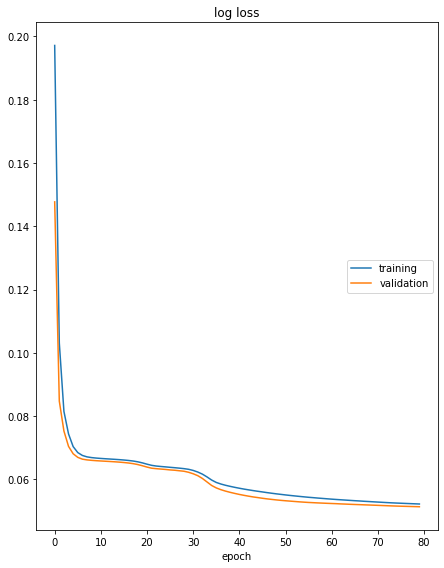

log loss
	training         	 (min:    0.052, max:    0.197, cur:    0.052)
	validation       	 (min:    0.051, max:    0.148, cur:    0.051)

 Number of parameters:  18457
Time taken:  45.95293951034546


In [13]:
start = time.time()

latent_space_dim = 2
model_name = 'GCN_AE_GCN_latDim2'

model1, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='GCN_AE_GCN_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

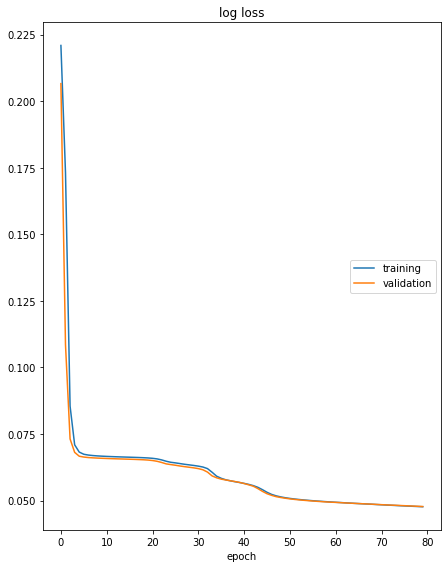

log loss
	training         	 (min:    0.048, max:    0.221, cur:    0.048)
	validation       	 (min:    0.048, max:    0.207, cur:    0.048)

 Number of parameters:  34223
Time taken:  44.00652456283569


In [14]:
start = time.time()

latent_space_dim = 4
model_name = 'GCN_AE_GCN_latDim4'

model2, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='GCN_AE_GCN_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

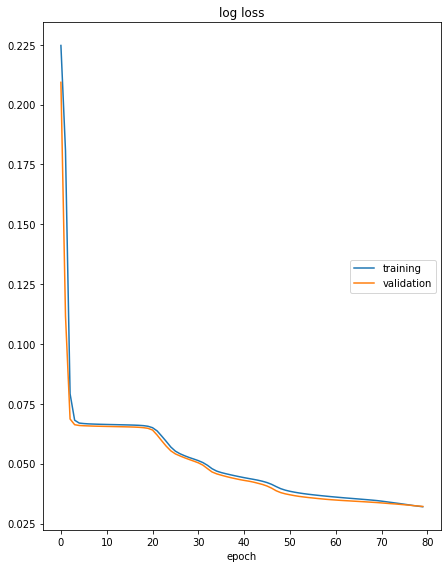

log loss
	training         	 (min:    0.032, max:    0.225, cur:    0.032)
	validation       	 (min:    0.032, max:    0.209, cur:    0.032)

 Number of parameters:  65899
Time taken:  44.00088405609131


In [15]:
start = time.time()

latent_space_dim = 8
model_name = 'GCN_AE_GCN_latDim8'

model3, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='GCN_AE_GCN_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

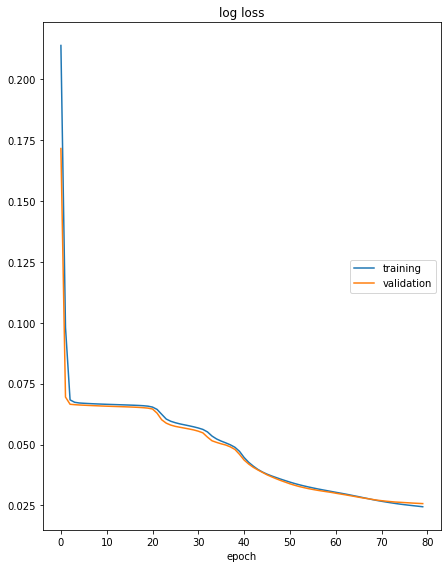

log loss
	training         	 (min:    0.024, max:    0.214, cur:    0.024)
	validation       	 (min:    0.026, max:    0.172, cur:    0.026)

 Number of parameters:  129827
Time taken:  43.82916498184204


In [16]:
start = time.time()

latent_space_dim = 16
model_name = 'GCN_AE_GCN_latDim16'

model4, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='GCN_AE_GCN_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

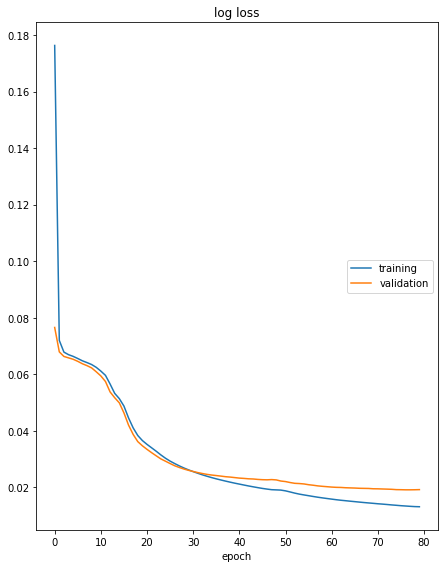

log loss
	training         	 (min:    0.013, max:    0.176, cur:    0.013)
	validation       	 (min:    0.019, max:    0.077, cur:    0.019)

 Number of parameters:  259987
Time taken:  44.085386991500854


In [17]:
start = time.time()

latent_space_dim = 32
model_name = 'GCN_AE_GCN_latDim32'

model5, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='GCN_AE_GCN_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

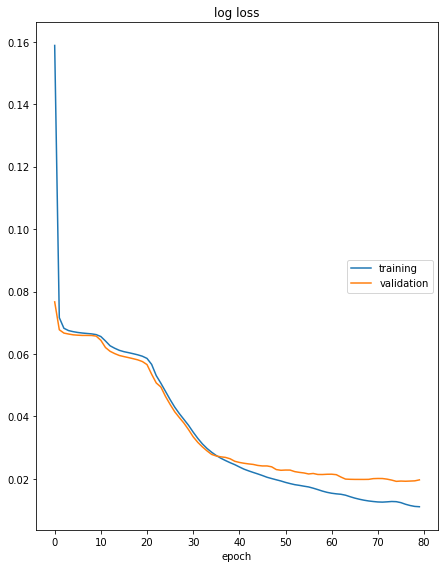

log loss
	training         	 (min:    0.011, max:    0.159, cur:    0.011)
	validation       	 (min:    0.019, max:    0.077, cur:    0.020)

 Number of parameters:  529523
Time taken:  43.994136333465576


In [18]:
start = time.time()

latent_space_dim = 64
model_name = 'GCN_AE_GCN_latDim64'

model6, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='GCN_AE_GCN_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

## MSE results

In [19]:
models_names = list( results_models.keys() )

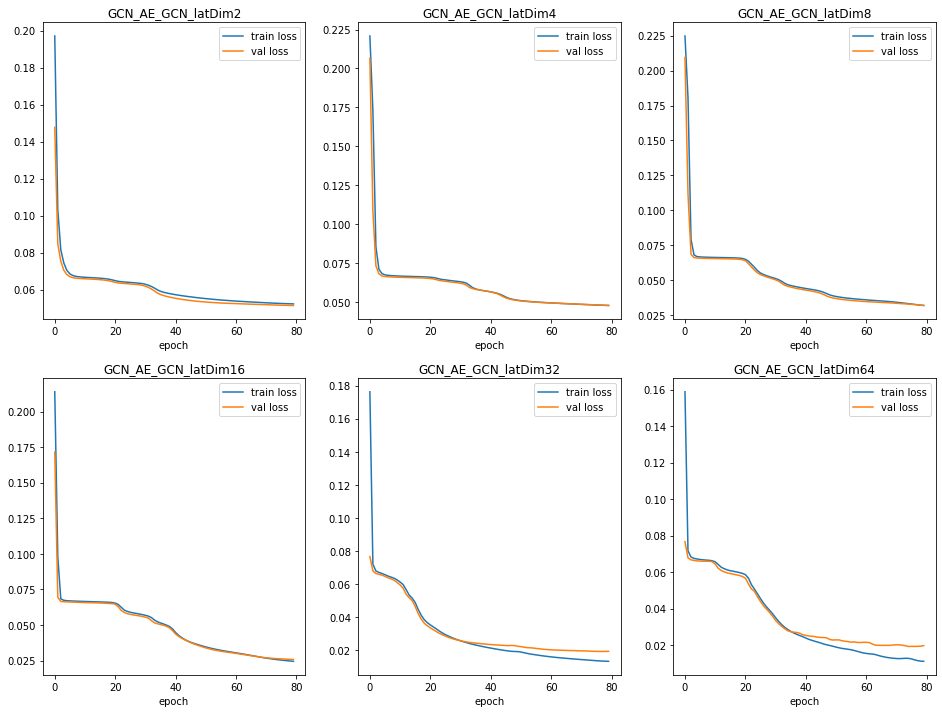

In [20]:
# filename = 'mnist_sequential_models_losses.png'
plot_losses(results_models, models_names, figsize=(16,12)
               # , filename=filename 
           )

In [21]:
rank_losses(results_models, models_names, selected_epoch = int(num_epochs/4) )

,variants_name,final_validation_loss
0,GCN_AE_GCN_latDim32,0.034698
1,GCN_AE_GCN_latDim64,0.057562
2,GCN_AE_GCN_latDim2,0.064325
3,GCN_AE_GCN_latDim8,0.064780
4,GCN_AE_GCN_latDim16,0.064951
5,GCN_AE_GCN_latDim4,0.065207


In [22]:
rank_losses(results_models, models_names, selected_epoch = int(num_epochs/2) )

,variants_name,final_validation_loss
0,GCN_AE_GCN_latDim32,0.023451
1,GCN_AE_GCN_latDim64,0.025619
2,GCN_AE_GCN_latDim8,0.043375
3,GCN_AE_GCN_latDim16,0.045947
4,GCN_AE_GCN_latDim2,0.055586
5,GCN_AE_GCN_latDim4,0.056816


In [23]:
# first_column_model_name = 'Model1'
filename = 'mnist_diffLatentDimensions.csv'

df_losses = rank_losses(results_models, models_names, selected_epoch = num_epochs,
                       # first_column_model_name = first_column_model_name, 
                        filename = filename )

df_losses

CSV was saved


,variants_name,final_validation_loss
0,GCN_AE_GCN_latDim32,0.019196
1,GCN_AE_GCN_latDim64,0.019655
2,GCN_AE_GCN_latDim16,0.025721
3,GCN_AE_GCN_latDim8,0.032134
4,GCN_AE_GCN_latDim4,0.047757
5,GCN_AE_GCN_latDim2,0.051376


# Plot the results

Indexes plotted [51 92 14 71 60]


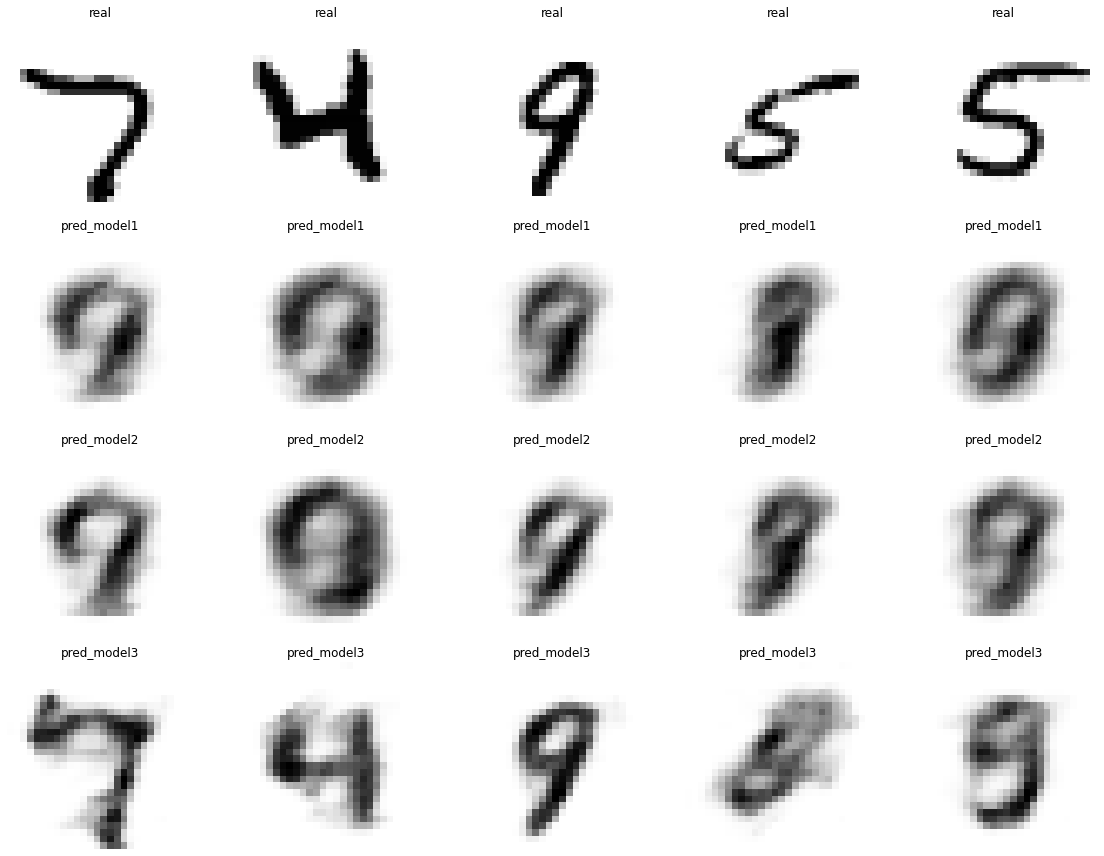

In [24]:
compare_three_plots_models_mnist(model1, model2, model3,
                               graph_data_list_test, nDisplay=5, axis_off=True, 
                               random=True, batch_size=32 )

Indexes plotted [20 82 86 74 74]


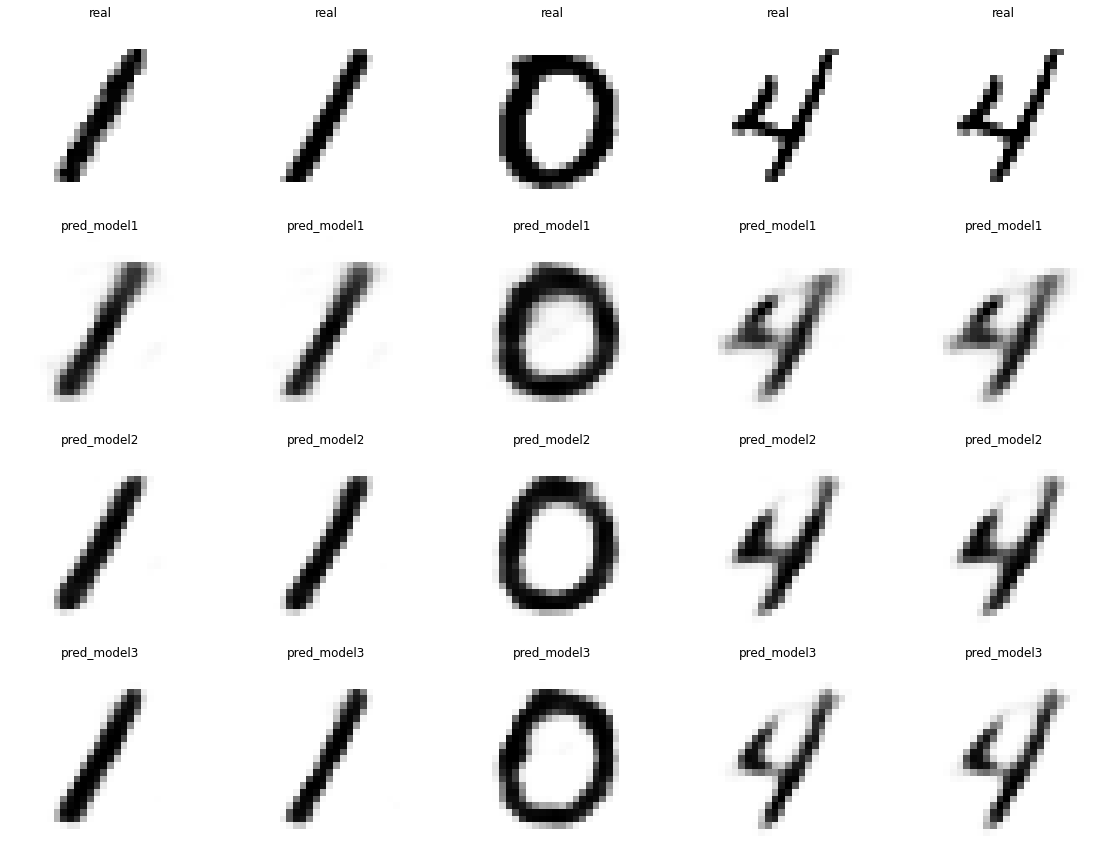

In [25]:
compare_three_plots_models_mnist(model4, model5, model6, 
                               graph_data_list_test, nDisplay=5, axis_off=True, 
                               random=True, batch_size=32 
                                 # ,save_fig=True, filename='mnist_models_decompressed.png' 
                                )